<a href="https://colab.research.google.com/github/hakdj/mlearning/blob/master/0925_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도구 모음

In [21]:
!pip install konlpy

In [22]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출
from konlpy.tag import Twitter # 한글 형태소 추출

from collections import Counter # count 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 파일 가져오기

In [23]:
df=pd.read_csv('./youtubecomment.csv',encoding='cp949')

In [24]:
df.isnull().sum()

title      0
video      0
comment    3
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9182 non-null   object
 1   video    9182 non-null   object
 2   comment  9179 non-null   object
dtypes: object(3)
memory usage: 215.3+ KB


In [26]:
df

,title,video,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디
...,...,...,...
9177,열무,8PEOg1YFqUU,꼭 해봐야겠네요 맛있게 잘 될것같아요
9178,열무,8PEOg1YFqUU,배즙 말고 다른 재료는 어떤게 있을까요? 배가 많이 비싸요
9179,열무,8PEOg1YFqUU,좋아요 꾹 입니다
9180,열무,8PEOg1YFqUU,"수박을 열무랑 함께하면 무슨 맛일까..? 궁금해서 저도 열무,얼갈이 사러 갑니다.ㅎ..."


In [27]:
df2=df.dropna(how='any')

In [28]:
df2=df2.reset_index()

In [29]:
df2

,index,title,video,comment
0,0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,4,콩,eu7HhcuRsL4,나중에 해줘야디
...,...,...,...,...
9174,9177,열무,8PEOg1YFqUU,꼭 해봐야겠네요 맛있게 잘 될것같아요
9175,9178,열무,8PEOg1YFqUU,배즙 말고 다른 재료는 어떤게 있을까요? 배가 많이 비싸요
9176,9179,열무,8PEOg1YFqUU,좋아요 꾹 입니다
9177,9180,열무,8PEOg1YFqUU,"수박을 열무랑 함께하면 무슨 맛일까..? 궁금해서 저도 열무,얼갈이 사러 갑니다.ㅎ..."


### 원하는 농수산물 선택해서 list에 담기

In [30]:
df3=pd.DataFrame()
lists=[]
ans=input()
for i in range(0,len(df2)):
  if df2['title'][i]==ans:
    lists.append(df2['comment'][i])
    df3=df3.append(df2.iloc[[i]],ignore_index=True)






열무


In [31]:
df3['video'].value_counts()

FN02e4DYvpA    97
8PEOg1YFqUU    20
Name: video, dtype: int64

In [32]:
len(df3['video'].value_counts())

2

In [33]:
titlelist = df2['title'].unique()

for i in range(len(df2)) :
  for z in titlelist :
    if df2.iloc[i]['title'] == z :
      title_df = df2[df2['title']==z]
      recipe_list = title_df['video'].unique()

      com_all_list = []
      com_lists = []

      for k in recipe_list :
        newdf = title_df[title_df['video']==k]
        for y in range(len(newdf)) :
          com_lists.append(newdf.iloc[y]['comment'])
        com_all_list.append([z, k, com_lists])
        com_lists = []

In [34]:
com_lists

[]

In [35]:
df2['video'][92]

'eu7HhcuRsL4'

In [36]:
df2['video'][93]

'JzyYs3lV2Gs'

In [37]:
# 담긴 내용 확인용
lists

['저희 어머니해드렸는데 맛있다그러시더라구요ㅎㅎ',
 'Mhm i wonder if i can use green mustard instead of young radishes. It’s not available in my area',
 '백선생님! 오늘도 덕분에 맛있는 점심 먹었어요. 친정 텃밭에서 뽑아온 열무가 너무 많아서 어떻게 먹을까 고만이었는데 제대로 먹었어요. 항상 건강하시고 파이팅입니다',
 '물이 왜 노랑색이지..',
 '열무데쳐서 꼭짜서 해봤는데 더 고소 담백한데 단점이 국물이읍써서 뻑뻑해요ㅋ짜고 역시 백종원님 레시피는 이유가있죠ㅎ',
 '당장 해먹어야 겠어요. 근데, 저 덮밥그릇 넘 예쁘네요 정보 좀 알수 있을까요?',
 '백선생님... 그저.. 빛.....!',
 '자~알 만들어서 판끼 때웠습니다. 감사합니다^^',
 '열무 항상 김치만 해먹었는데 오늘 드디어 덮밥 해먹었어요!! 너~~무 맛있게 잘먹었습니다. 역시 굿 ?? 굿굿굿이예요!!',
 '사라는거 아닙니더~~ 백형님 된장이쥬? 백석된장이어유',
 '됫고 기냥 이거로 잡솨~ 백형 만능 쏘쓰으: 사라는거 아님니돠~',
 '백선생님 저는 요리 하기 싫은데 백선생님 요리 보면 너무너무 좋아요~쉽게 재밌게 이해하기 아주 좋아요~ 이제 저도 백선생님 요리로 맛있게 합니다~ 계속 이렇게 요리 해 주세요. 백선생님!!!! 응원합니다~',
 'ㅠ.ㅠ 열무를 다 삶아놨는데. 삶은 열무도 괜찮나요',
 '해먹어 봐야 겠네요 . 김 잘게 열무잘게 양념 간장에 묻혀 먹어도 별미 입니다. 감사합니다',
 '오늘은 열무대신 가지로 했는데 존맛탱 ㅋㅋ 제료준비도중에 식용유가 떨어져서ㅜㅜ 급하게 올리브유로 했거든요. 걱정했는데 된장고추장 향이 강해서 올리브향이 하나도 안나더라구요. 다행 ㅎㅎ 너무 고온이면 엑스트라버진은 타버리니까 조심해서 만들었는데 맛있었어요. 가지랑 올리브유가 잘 어울리는 궁합이기도 하고요 ㅎㅎ 맛있습니다~5인분정도 만들어서 쟁여놓았어요 ㅎㅎ',
 '이거 진짜 맛있어요 ㅎㅎ 배추로 해서 먹었는데 

### 이모티콘 제거
### 코멘트 df 생성 및 저장

In [38]:
import re

In [39]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

def apply_regular_expression(text):
    hans = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]') # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hans.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [40]:
#코멘트 df생성 및 저장
comment_result = []
for i in range(0,len(lists)):
  tokens = re.sub(emoji_pattern,"", lists[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
#comment_result
comment_result.to_csv(r"./"+f"{ans}.csv",index=False, encoding='CP949')
type(comment_result)

pandas.core.frame.DataFrame

# 분석

### 명사 전처리 및 빈도 출력

In [41]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

In [42]:
#확인용
morphs

[[('저희', 'Noun'),
  ('어머니', 'Noun'),
  ('해드렸는데', 'Verb'),
  ('맛있다', 'Adjective'),
  ('그러시더라구요', 'Adjective'),
  ('ㅎㅎ', 'KoreanParticle')],
 [('Mhm', 'Alpha'),
  ('i', 'Alpha'),
  ('wonder', 'Alpha'),
  ('if', 'Alpha'),
  ('i', 'Alpha'),
  ('can', 'Alpha'),
  ('use', 'Alpha'),
  ('green', 'Alpha'),
  ('mustard', 'Alpha'),
  ('instead', 'Alpha'),
  ('of', 'Alpha'),
  ('young', 'Alpha'),
  ('radishes', 'Alpha'),
  ('.', 'Punctuation'),
  ('It', 'Alpha'),
  ('’', 'Punctuation'),
  ('s', 'Alpha'),
  ('not', 'Alpha'),
  ('available', 'Alpha'),
  ('in', 'Alpha'),
  ('my', 'Alpha'),
  ('area', 'Alpha')],
 [('백', 'Modifier'),
  ('선생님', 'Noun'),
  ('!', 'Punctuation'),
  ('오늘', 'Noun'),
  ('도', 'Josa'),
  ('덕분', 'Noun'),
  ('에', 'Josa'),
  ('맛있는', 'Adjective'),
  ('점심', 'Noun'),
  ('먹었어요', 'Verb'),
  ('.', 'Punctuation'),
  ('친정', 'Noun'),
  ('텃밭', 'Noun'),
  ('에서', 'Josa'),
  ('뽑아', 'Verb'),
  ('온', 'Noun'),
  ('열무', 'Noun'),
  ('가', 'Josa'),
  ('너무', 'Adverb'),
  ('많아서', 'Adjective'),
  ('어떻게'

In [43]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['저희', '어머니', 'Mhm', 'i', 'wonder', 'if', 'i', 'can', 'use', 'green', 'mustard', 'instead', 'of', 'young', 'radishes', 'It', 's', 'not', 'available', 'in', 'my', 'area', '오늘', '덕분', '점심', '친정', '텃밭', '온', '열무', '고', '제대로', '항상', '왜', '노랑', '색', '열무', '데', '꼭', '고소', '단점', '국물', '읍', '뻑뻑', '역시', '백종원', '레시피', '당장', '해먹', '저', '정보', '좀', '빛', '자', '알', '판끼', '열무', '항상', '김치', '해', '오늘', '밥', '해', '너', '무', '역시', '굿', '굿굿굿', '사라', '거', '형님', '된장', '쥬', '된장', '어유', '됫', '기', '거', '잡솨', '형', '만능', '사라', '거', '돠', '저', '요리', '요리', '저', '요리', '계속', '요리', '해', '응원', '열무', '열무', '해먹', '김', '열무', '양념', '간장', '별미', '오늘', '열무', '대신', '가지', '존맛', '료', '준비', '도중', '식용유', '올리브유', '걱정', '된장', '고추장', '향', '올리브', '향', '다행', '고온', '엑스트라', '버진', '타', '가지', '올리브유', '궁합', '인분', '정도', '쟁', '거', '진짜', '배추', '거', '양배추', '쌈', '진짜', '존맛', '양배추', '통', '혼자', '돼지고기', '시금치', '청량고추', '밥', '해먹', '시금치', '열무', '해도', '미국', '무심', '거', '맛', '설', '막', '얼', '배추', '식감', '삭', '열무', '버전', '보리밥', '맛', '청양고추', '꼭', '풋', '고추', '오리

In [44]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'열무': 42, '거': 20, '맛': 20, '된장': 14, '해': 13, '진짜': 13, '요리': 12, '열무김치': 12, '레시피': 10, '밥': 9, '융': 9, '오늘': 8, '백종원': 8, '해먹': 8, '항상': 7, '저': 7, '좀': 7, '보고': 7, '요': 6, '집': 6, '때': 6, '최고': 6, '왜': 5, '꼭': 5, '향': 5, '해도': 5, '삭': 5, '방송': 5, '역시': 4, '유': 4, '영상': 4, '여름': 4, '쌤': 4, '음식': 4, '홍보': 4, '덕분': 3, '온': 3, '국물': 3, '알': 3, '김치': 3, '가지': 3, '존맛': 3, '정도': 3, '쌈': 3, '돼지고기': 3, '시금치': 3, '얼': 3, '방법': 3, '애': 3, '처음': 3, '완전': 3, '감사': 3, '주부': 3, '입맛': 3, '소리': 3, '글': 3, '어디': 3, 'gt': 3, 'lt': 3, '난': 3, '냉면': 3, '활용': 3, '줄': 3, '대표': 3, '마음': 3, '사진': 3, '사용': 3, '저희': 2, 'i': 2, 'use': 2, 'of': 2, 'in': 2, 'my': 2, '정보': 2, '무': 2, '사라': 2, '형님': 2, '양념': 2, '준비': 2, '올리브유': 2, '고추장': 2, '배추': 2, '양배추': 2, '통': 2, '식감': 2, '보리밥': 2, '간': 2, 'g': 2, '다시': 2, '뿌리': 2, '고기': 2, '냄새': 2, '사람': 2, '개인': 2, '강추': 2, '조합': 2, '진심': 2, '용': 2, '하루': 2, '잎': 2, '로': 2, '점점': 2, '대박': 2, '참고': 2, '장사': 2, '식당': 2, '출연': 2, '개맛': 2, '메뉴': 2, '로만': 2, '정상': 2, '장': 2, '특

### 시각화

In [45]:
from wordcloud import WordCloud # 텍스트 시각화
import matplotlib.pyplot as plt # 시각화 패키지
import matplotlib 
from IPython.display import set_matplotlib_formats

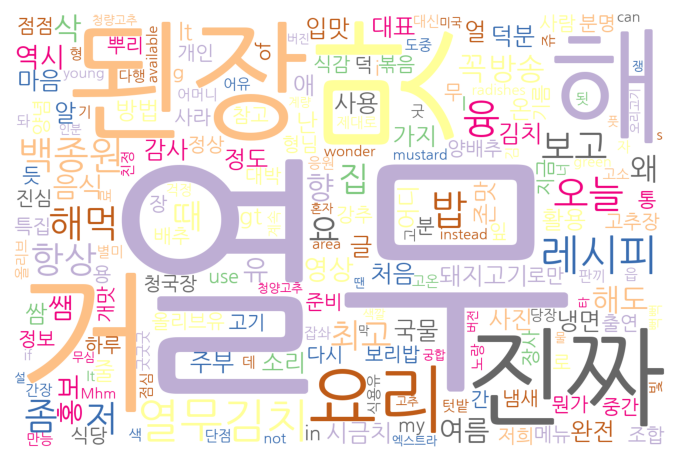

In [46]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### 그래프

In [47]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/NanumSquareL.ttf"
fontprop = fm.FontProperties(fname=path, size=20) # 글자 크기 조정

In [48]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)



pandas.core.frame.DataFrame

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


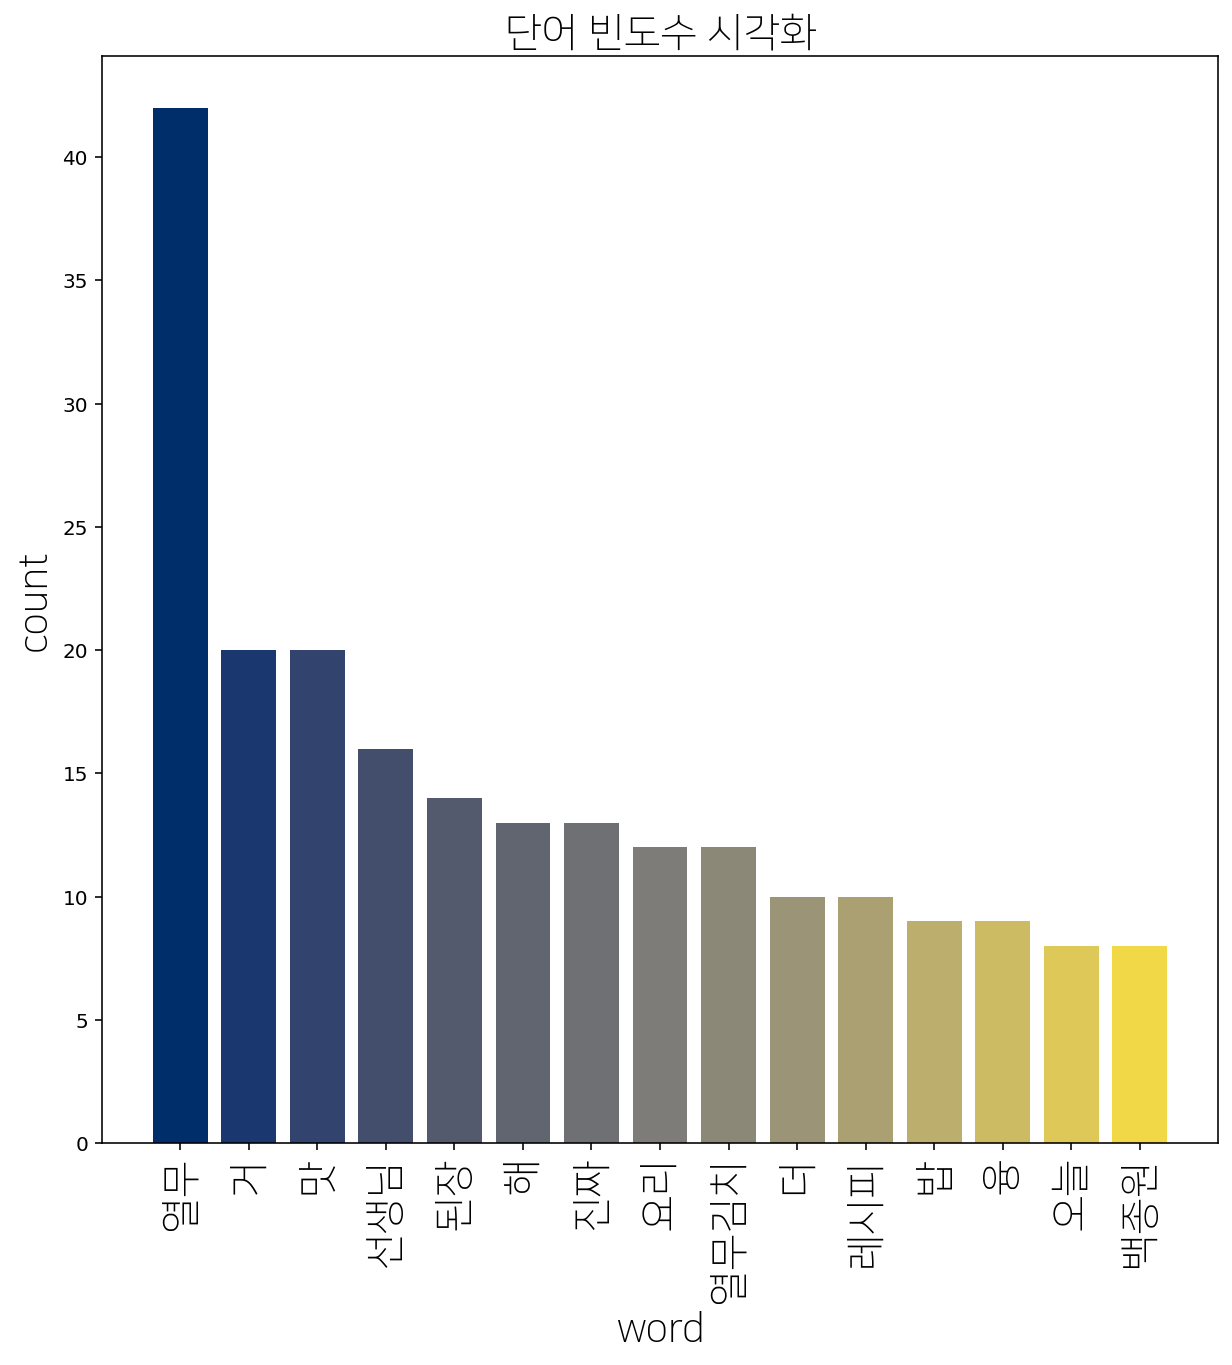

In [49]:

noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#차트에 컬러넣기
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#그리고 밑에다가 plt.차트형식(괄호 안에 color=추가)



index = np.arange(len(test))
plt2.bar(index,test['count'].tolist(),color=colors)
plt2.xlabel('word', fontsize=8, fontproperties=fontprop)
plt2.ylabel('count', fontsize=8, fontproperties=fontprop)
plt2.xticks(index, test['word'].tolist(), fontsize=1, fontproperties=fontprop, rotation=90)
plt2.title('단어 빈도수 시각화',  fontsize=12, fontproperties=fontprop)
plt2.rcParams['figure.figsize'] = [10, 5]
fig2 = plt2.figure(1)
fig2.set_size_inches(10, 10) # 사이즈 조정

plt2.show()



### 긍정 부정 분석

In [50]:
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
lists

['저희 어머니해드렸는데 맛있다그러시더라구요ㅎㅎ',
 'Mhm i wonder if i can use green mustard instead of young radishes. It’s not available in my area',
 '백선생님! 오늘도 덕분에 맛있는 점심 먹었어요. 친정 텃밭에서 뽑아온 열무가 너무 많아서 어떻게 먹을까 고만이었는데 제대로 먹었어요. 항상 건강하시고 파이팅입니다',
 '물이 왜 노랑색이지..',
 '열무데쳐서 꼭짜서 해봤는데 더 고소 담백한데 단점이 국물이읍써서 뻑뻑해요ㅋ짜고 역시 백종원님 레시피는 이유가있죠ㅎ',
 '당장 해먹어야 겠어요. 근데, 저 덮밥그릇 넘 예쁘네요 정보 좀 알수 있을까요?',
 '백선생님... 그저.. 빛.....!',
 '자~알 만들어서 판끼 때웠습니다. 감사합니다^^',
 '열무 항상 김치만 해먹었는데 오늘 드디어 덮밥 해먹었어요!! 너~~무 맛있게 잘먹었습니다. 역시 굿 ?? 굿굿굿이예요!!',
 '사라는거 아닙니더~~ 백형님 된장이쥬? 백석된장이어유',
 '됫고 기냥 이거로 잡솨~ 백형 만능 쏘쓰으: 사라는거 아님니돠~',
 '백선생님 저는 요리 하기 싫은데 백선생님 요리 보면 너무너무 좋아요~쉽게 재밌게 이해하기 아주 좋아요~ 이제 저도 백선생님 요리로 맛있게 합니다~ 계속 이렇게 요리 해 주세요. 백선생님!!!! 응원합니다~',
 'ㅠ.ㅠ 열무를 다 삶아놨는데. 삶은 열무도 괜찮나요',
 '해먹어 봐야 겠네요 . 김 잘게 열무잘게 양념 간장에 묻혀 먹어도 별미 입니다. 감사합니다',
 '오늘은 열무대신 가지로 했는데 존맛탱 ㅋㅋ 제료준비도중에 식용유가 떨어져서ㅜㅜ 급하게 올리브유로 했거든요. 걱정했는데 된장고추장 향이 강해서 올리브향이 하나도 안나더라구요. 다행 ㅎㅎ 너무 고온이면 엑스트라버진은 타버리니까 조심해서 만들었는데 맛있었어요. 가지랑 올리브유가 잘 어울리는 궁합이기도 하고요 ㅎㅎ 맛있습니다~5인분정도 만들어서 쟁여놓았어요 ㅎㅎ',
 '이거 진짜 맛있어요 ㅎㅎ 배추로 해서 먹었는데 

#### 긍정어 부정어 사전

In [ ]:
#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(wordname):	
		with open('/content/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('어근 : ' + r_word)
		print('극성 : ' + s_word)		
		
		
		return r_word, s_word

if __name__ == "__main__":
	
	ksl = KnuSL
	
	print("\nKNU 한국어 감성사전입니다~ :)")
	print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
	print("종료하시려면 #을 입력해주세요!!!")
	print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\n이용해주셔서 감사합니다~ :)")
			break



KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정




#### 불용어 사전

In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

불용어 사전에 추가하기

In [ ]:
recipy_words = ['백쌤', '백종원','보다','요린이','에어프라이어','요식업','겁나','썸네일','존귀','썸넬']
for word in recipy_words:
    stopwords.append(word)

#### 정규 표현식 처리

In [ ]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result



#### 명사 형태소 추출

In [ ]:
# lists 에서 명사형태소 추출
okt=Okt()
corpus = "".join(lists)
nouns = okt.nouns(apply_regular_expression(corpus))

# 카운트 세기
counter = Counter(nouns)
counter.most_common(10)


# 한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)


* 한글자 명사 제거
* 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보임.

BoW 벡터 생성

In [ ]:
def text_cleaning(text):
    hangul = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns


vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(lists)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


In [ ]:
word_list

In [ ]:
#-*-coding:utf-8-*-

import json

class DICC():

	def data_list(wordname):	
		with open('/content/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
		
		return r_word, s_word




In [ ]:
a=[]
for i in range(0,len(word_list)):
	a.append(DICC.data_list(word_list[i]))

sum=0
for i in range(0,len(a)):
  if a[i][1]!= 'None':
    sum+=int(a[i][1])
print(sum)

#### Ex)

In [ ]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df2['comment'][0]))
nouns

##### 말뭉치 생성

In [ ]:
corpus = "".join(df2['comment'].tolist())
corpus


불용어구 삭제

In [ ]:
apply_regular_expression(corpus)

##### 전체 말뭉치에서 명사 형태소 추출

In [ ]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

##### 빈도수 세기

In [ ]:
counter = Counter(nouns)

In [ ]:
counter.most_common(10)

* 한글자 명사 제거
* 위 결과에서 보이듯이, 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보임.



In [ ]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

#### 단어 리스트

In [ ]:
print(word_list)

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

👻👻👻👻👻👻👻👻👻👻👻👻👻👻👻👻

In [ ]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

In [ ]:
bow_vect.shape

##### "단어" - "총 등장 횟수" Matching


In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

#### TF-IDF 변환

* Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

* 한 행(row)은 한 리뷰를 의미
* 한 열(column)은 한 단어를 의미

In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

In [ ]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())


##### “벡터” - “단어” mapping

In [ ]:
vect.vocabulary_

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


### 감성 분류 - Logistic Regression

#### Label